Design and implement a Python program to build a binary classifier using the
Perceptron Learning Algorithm. The Iris dataset  will  be
used to train and test the Perceptron Learning Algorithm. Focus on two classes
of the Iris dataset (e.g., "Iris-setosa" and
"Iris-versicolor") to create a binary classification problem. Use
only two features (e.g., "sepal length" and "sepal width")
for simplicity and visualization. Measure performance using Accuracy on the test
set. Also Visualize the learned decision boundary.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:

iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features: sepal length and sepal width
Y = iris.target


MPNeuron Class Definition

In [ ]:
class MPNeuron:
    def __init__(self):
        self.b = None

    def model(self, x):
        # Simple model of Perceptron: sum(x) >= b
        return sum(x) >= self.b

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

    def fit(self, X, Y):
        accuracy = {}

        # Try different thresholds (b) to find the optimal one
        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)

        # Select the best b based on accuracy
        best_b = max(accuracy, key=accuracy.get)
        self.b = best_b

        print('Optimal value of b is', best_b)
        print('Highest accuracy is', accuracy[best_b])





In [ ]:
Y_binary = (Y == 0).astype(int)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_binary, test_size=0.3, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Optimal value of b is 2
Highest accuracy is 0.6761904761904762
Accuracy on the test set: 57.78%


<ipython-input-16-cb48c0d39dda>:22: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', marker='x', cmap=plt.cm.Paired)


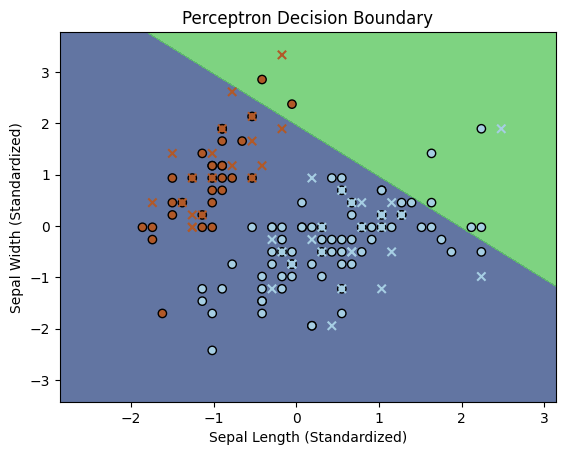

In [ ]:
# Create the Perceptron model and train it
mp_neuron = MPNeuron()
mp_neuron.fit(X_train, Y_train)

# Make predictions and calculate accuracy on the test set
Y_pred = mp_neuron.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

# Visualize the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = mp_neuron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolors='k', marker='o', cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', marker='x', cmap=plt.cm.Paired)
plt.title('Perceptron Decision Boundary')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.show()


Accuracy on the test set: 100.00%


<ipython-input-17-b69dc4b66f02>:49: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', marker='x', cmap=plt.cm.Paired)


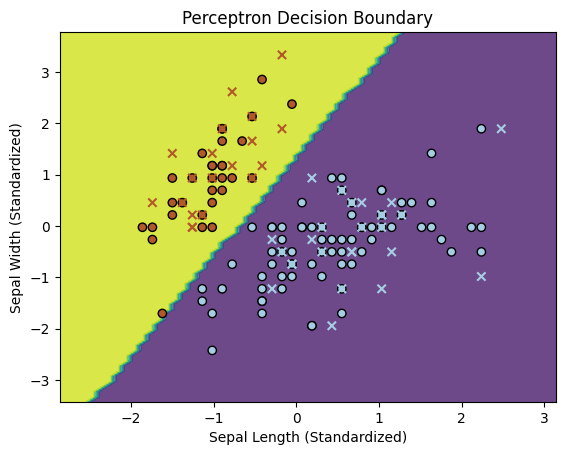

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
          for idx, x_i in enumerate(X):
              linear_output = np.dot(x_i, self.weights) + self.bias
              y_predicted = self.unit_step_func(linear_output)

              update = self.learning_rate * (Y[idx] - y_predicted)
              self.weights += update * x_i
              self.bias += update

    def unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.unit_step_func(linear_output)
        return y_predicted

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')


x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolors='k', marker='o', cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', marker='x', cmap=plt.cm.Paired)
plt.title('Perceptron Decision Boundary')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.show()


Accuracy on the test set: 100.00%


<ipython-input-19-8cc5f35ec062>:93: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', marker='x', cmap=plt.cm.Paired)


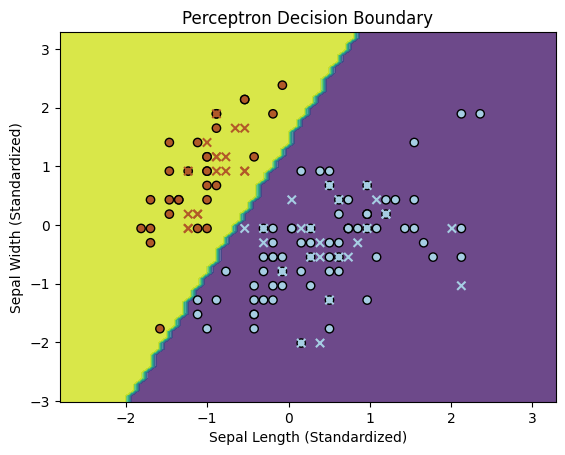

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features: sepal length and sepal width
Y = iris.target
Y_binary = (Y == 0).astype(int)


def remove_outliers_iqr(X, Y):
    Q1 = np.percentile(X, 25, axis=0)
    Q3 = np.percentile(X, 75, axis=0)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_mask = np.any((X < lower_bound) | (X > upper_bound), axis=1)

    X_filtered = X[~outlier_mask]
    Y_filtered = Y[~outlier_mask]

    return X_filtered, Y_filtered

X_filtered, Y_filtered = remove_outliers_iqr(X, Y_binary)

X_train, X_test, Y_train, Y_test = train_test_split(X_filtered, Y_filtered, test_size=0.3, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
          for idx, x_i in enumerate(X):
              linear_output = np.dot(x_i, self.weights) + self.bias
              y_predicted = self.unit_step_func(linear_output)

              update = self.learning_rate * (Y[idx] - y_predicted)
              self.weights += update * x_i
              self.bias += update

    def unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.unit_step_func(linear_output)
        return y_predicted


# Create the Perceptron model and train it with more epochs
perceptron = Perceptron(n_iters=5000)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')


x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolors='k', marker='o', cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', marker='x', cmap=plt.cm.Paired)
plt.title('Perceptron Decision Boundary')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.show()